<a href="https://colab.research.google.com/github/Jun-yong-lee/pythonStudy/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **선형 회귀**
회귀 : 두 변수 사이의 상관관계를 분석하는 방법을 말함



In [ ]:
import numpy as np
explanatory_variable = np.array(
    [5, -15, 7, -7, -11, 3, -9, 1, -1, 11, 9, -13, 13, -3, -5]
    ) # 설명 변수 dataset

target_variable = np.array(
    [18, -82, 28, -42, -62, 8, -52, -2, -12, 48, 38, -72, 58, -22, -32]
    ) # 목표 변수 dataset

In [ ]:
from sklearn.model_selection import train_test_split

## 훈련 세트와 테스트 세트로 나눕니다 ##
train_input, test_input, train_target, test_target = train_test_split(
    explanatory_variable, target_variable
    )

## 특성 테이터 2차원 배열 변환 ##
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

훈련에 사용할 데이터와 테스트에 사용할 데이터를 나눈다

테스트 데이터를 모델 훈련에서 독립적으로 만들어 성능 검증 시 사용한다

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape) # 2차원 배열 변환
print(test_input.shape) # 2차원 배열 변환

(11, 1)
(4, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다
lr.fit(train_input, train_target)

# 5 data에 대해 예측합니다
print(lr.predict([[5]]))

[18.]


In [ ]:
print(lr.coef_, lr.intercept_)

[5.] -7.0


**목표 변수 = 5.0 x (설명변수) -7**

coef_, intercept_ : 모델파라미터(model parameter)

[ y = 5x - 7의 그래프 ]

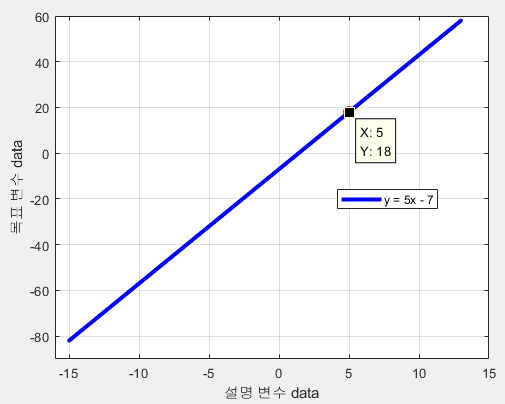

***학습시킨 모델의 성능 테스트***

R^2 = 1 - (타깃 - 예측)^2 / (타깃 - 평균)^2

사이킷런의 score() 메서드가 출력하는 값이 1.0에 가까울수록 모델에 의해 예측이 잘된 것이다

따라서 설명변수 dataset과 목표변수 dataset으로 만든 모델이 잘 훈련됐다고 볼 수 있다



In [ ]:
## 결정계수
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

1.0
1.0


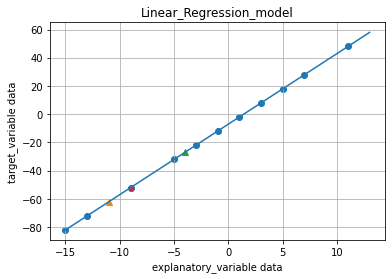

In [ ]:
import matplotlib.pyplot as plt
 
plt.scatter(train_input, train_target)
plt.plot([-15, 13], [-15*lr.coef_ + lr.intercept_, 13*lr.coef_ + lr.intercept_])
 
plt.scatter(-11, -62, marker = '^')
plt.scatter(-4, -27, marker = '^')
plt.scatter(-9, -52, marker = '*')
# 새로운 데이터 [[-11]], [[-4]], [[-9]] scatter를 이용해 표시
plt.grid(True)
plt.xlabel("explanatory_variable data")
plt.ylabel("target_variable data")
plt.title("Linear_Regression_model")
plt.show()

In [ ]:
print(lr.predict([[-11]]))
print(lr.predict([[-4]]))
print(lr.predict([[-9]]))

[-62.]
[-27.]
[-52.]


In [ ]:
new_data = [-11, -4, -9, 2, -10, -2, 0, -3, 1, -6, -7, -5, -8, -1]
result_predict = []
for i in new_data:
  print(lr.predict([[i]]))
  result_predict.append(lr.predict([[i]]))

[-62.]
[-27.]
[-52.]
[3.]
[-57.]
[-17.]
[-7.]
[-22.]
[-2.]
[-37.]
[-42.]
[-32.]
[-47.]
[-12.]


새로운 데이터 : [-11, -4, -9, 2, -10, -2, 0, -3, 1, -6, -7, -5, -8, -1]

목표값(예측값) : [-62, -27, -52, 3, -57, -17, -7, -22, -2, -37, -42, -32, -47, -12]

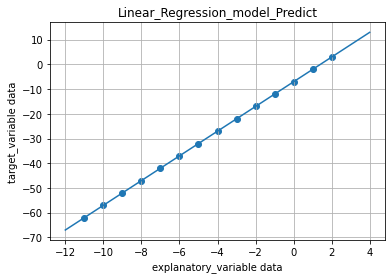

In [ ]:
point = np.arange(-12, 5)

plt.scatter(new_data, result_predict)
plt.plot(point, 5.0*point - 7)

plt.grid(True)
plt.xlabel("explanatory_variable data")
plt.ylabel("target_variable data")
plt.title("Linear_Regression_model_Predict")

plt.show()
